In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df = pd.read_csv('739to4000_with_tags,KL_divergence,FinRatios.csv')
df.head()

,adsh,fraud,ddate,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,0000002178-18-000009,0.0,20161231.0,106756000.0,7.875000e+07,6504000.0,1.114280e+08,2.210870e+08,2.163510e+09,0.0,...,0.539227,6.440080e+08,0.229387,26.298456,13.879142,0.038025,1.139030e+09,0.000000,0.316076,0.559690
1,0000002488-18-000042,0.0,20161231.0,126000000.0,2.010000e+09,90000000.0,3.825000e+09,9.210000e+08,6.611000e+09,948000000.0,...,1.464384,3.287000e+09,0.332087,78.555556,4.646393,0.012730,2.617100e+10,0.036223,0.261277,0.122158
2,0000002969-18-000014,0.0,20161231.0,-57400000.0,5.735000e+08,525400000.0,1.040000e+07,2.061000e+08,1.587700e+09,0.0,...,0.003057,2.948000e+08,0.156600,-32.796167,-11.129349,-0.030491,1.062500e+09,0.000000,0.320778,-0.217035
3,0000003499-18-000006,0.0,20161231.0,182581000.0,8.456940e+08,130820000.0,1.110608e+09,1.655981e+09,3.176400e+08,0.0,...,0.822055,1.179930e+08,0.270854,2.385971,152.977541,0.419117,5.371457e+09,0.000000,0.367267,-0.002388
4,0000003545-18-000021,0.0,20161231.0,7177000.0,-6.183000e+06,-16890000.0,-4.823000e+06,3.916000e+06,3.149000e+06,0.0,...,2.353128,2.942400e+07,0.903325,4.538526,80.422589,0.220336,7.572000e+06,0.000000,0.370623,6.116482


# DecisionTree - All features

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np 

In [5]:
df.columns[3]

'AccountsReceivable'

In [6]:
df.fraud.value_counts()

0.0    5069
1.0     739
Name: fraud, dtype: int64

In [7]:
X = df[df.columns[3:]]
y = df.fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
clf= DecisionTreeClassifier(random_state=10, criterion='gini',max_depth=4, min_samples_leaf=18, min_samples_split=11)
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)

In [11]:
# Calculate Accuracy , AUC and Confusion matrix 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,4)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
## Your code here 

Accuracy is :91.8732782369146

AUC is :0.7438

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,1236,22,1258
1.0,96,98,194
All,1332,120,1452


In [45]:
len(clf.feature_importances_)

28

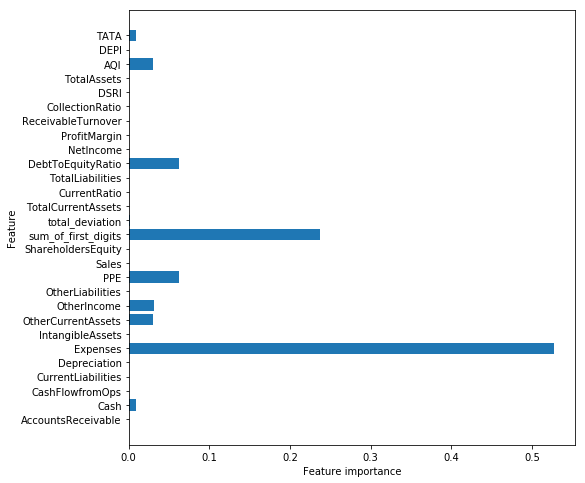

In [46]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(clf)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pred = clf.predict(X_test)#create predictions on our test set.
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1236   22]
 [  96   98]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1258
         1.0       0.82      0.51      0.62       194

   micro avg       0.92      0.92      0.92      1452
   macro avg       0.87      0.74      0.79      1452
weighted avg       0.91      0.92      0.91      1452



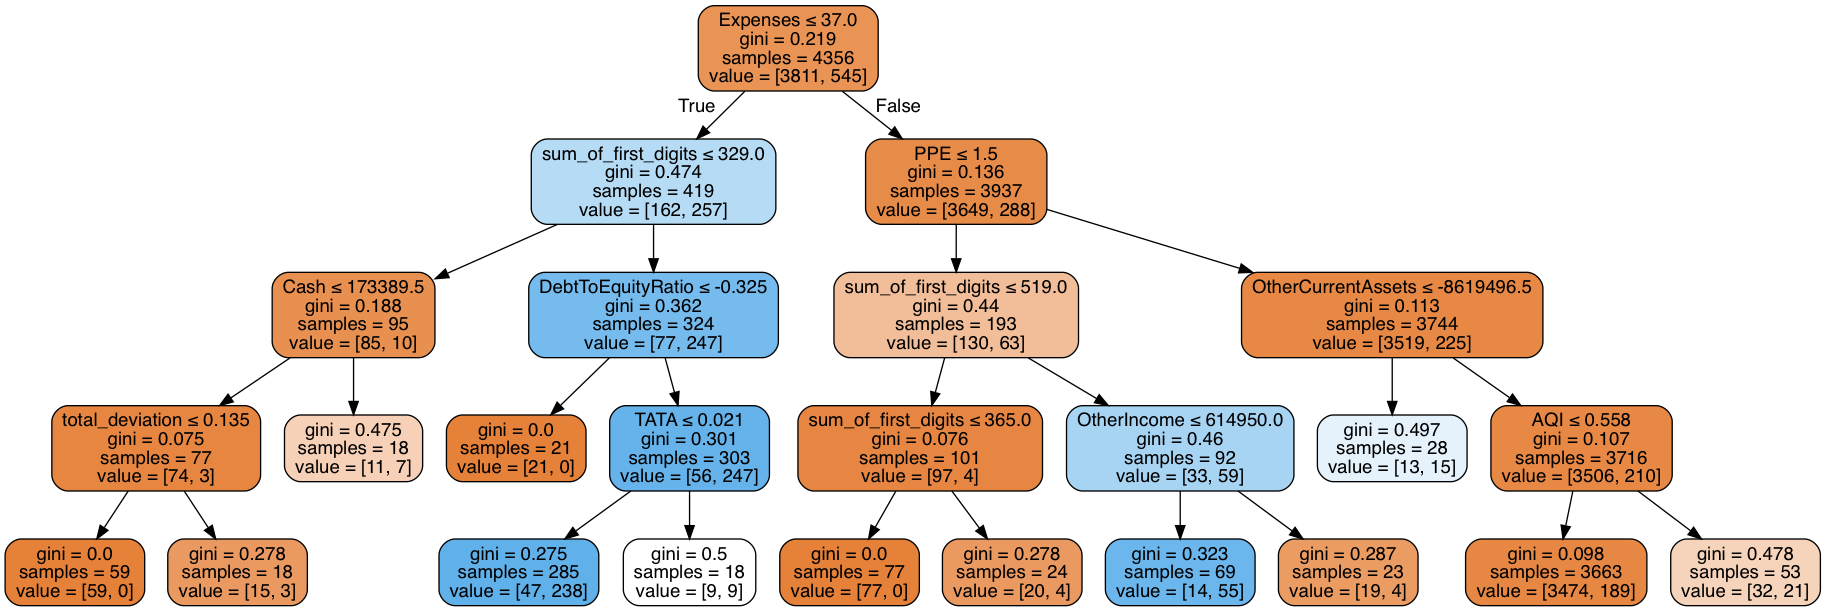

In [32]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Bagged Tree

In [49]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [50]:
bagged_tree.score(X_train, y_train)

0.9414600550964187

In [51]:
bagged_tree.score(X_test, y_test)

0.9269972451790633

# Random Forest

In [52]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)#higher number of estimators than our bagged trees
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
forest.score(X_train, y_train)

0.9366391184573003

In [54]:
forest.score(X_test, y_test)

0.928374655647383

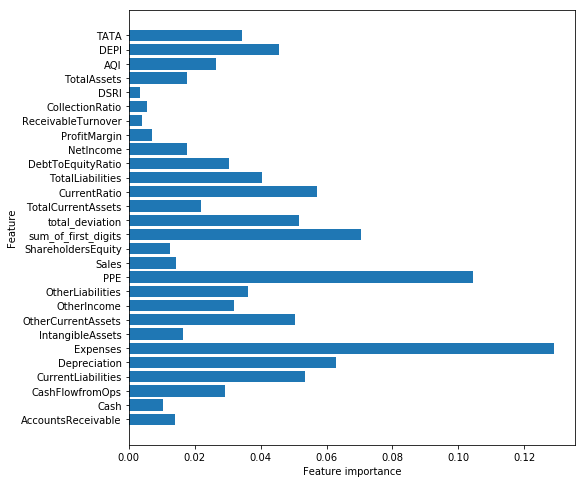

In [55]:
plot_feature_importances(forest)

In [35]:
from sklearn.ensemble import RandomForestClassifier
X = df[df.columns[3:]]
y = df.fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf2= RandomForestClassifier()
clf2.fit(X_train,y_train) 
y_pred = clf2.predict(X_test)

#  Calculate Accuracy , AUC and Confusion matrix 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,4)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
## Your code here 

Accuracy is :95.0413223140496

AUC is :0.8428

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,1245,13,1258
1.0,59,135,194
All,1304,148,1452


In [57]:
clf2.score(X_train, y_train)

0.9965564738292011

In [58]:
clf2.score(X_test, y_test)

0.9504132231404959

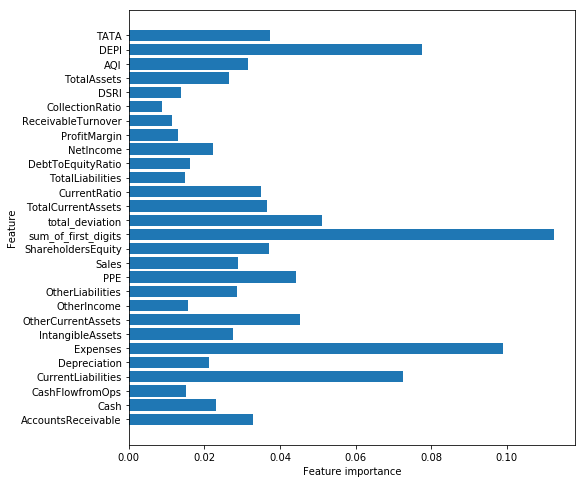

In [56]:
plot_feature_importances(clf2)